Describing a node
=======
![cen](https://miro.medium.com/max/4220/1*2aM28nzxiJKUdShS75bzEA.png)

## Centrality Measurements
```{note}
First of all, how should we define centrality? It just indicates the node is "central" to the network, which could indicate some sort of importance, significance, or having an advantaged position. However, that there are lots of specific ways we can think of centrality, and thus different ways of mathematically defining the concept.
 ```

 ### Degree Centrality
Degree centrality measures how connected is a node. Thus, the degree of a node is a simple measure of centrality in which more highly connected nodes rank higher. 

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
G = nx.generators.social.florentine_families_graph()

Node Degree
Acciaiuoli      1
Medici      6
Castellani      3
Peruzzi      3
Strozzi      4
Barbadori      2
Ridolfi      3
Tornabuoni      3
Albizzi      3
Salviati      2
Pazzi      1
Bischeri      3
Guadagni      4
Ginori      1
Lamberteschi      1


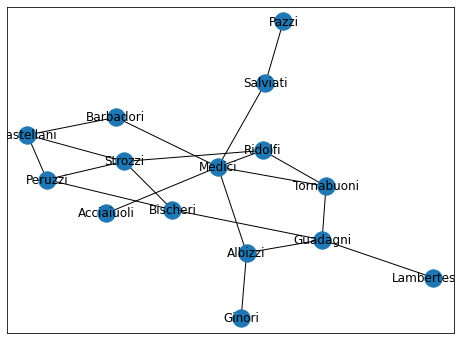

In [3]:
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
nx.draw_networkx(G, with_labels=True,ax=ax)

plt.show()

We can also normalize the degree centrality by dividing by the maximum possible degree in a simple graph $n-1$ where $n$ is the number of nodes in $G$.

In [4]:
sorted(nx.centrality.degree_centrality(G).items(), key=lambda item: item[1])

[('Acciaiuoli', 0.07142857142857142),
 ('Pazzi', 0.07142857142857142),
 ('Ginori', 0.07142857142857142),
 ('Lamberteschi', 0.07142857142857142),
 ('Barbadori', 0.14285714285714285),
 ('Salviati', 0.14285714285714285),
 ('Castellani', 0.21428571428571427),
 ('Peruzzi', 0.21428571428571427),
 ('Ridolfi', 0.21428571428571427),
 ('Tornabuoni', 0.21428571428571427),
 ('Albizzi', 0.21428571428571427),
 ('Bischeri', 0.21428571428571427),
 ('Strozzi', 0.2857142857142857),
 ('Guadagni', 0.2857142857142857),
 ('Medici', 0.42857142857142855)]

#### In-degree & Out-degree Centrality
The in-degree centrality for a node v is the fraction of nodes its **incoming** edges are connected to.
The out-degree centrality for a node v is the fraction of nodes its **outgoing** edges are connected to.

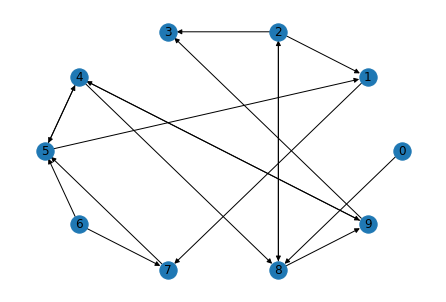

In [5]:
G_di=nx.fast_gnp_random_graph(10, 0.2, directed=True, seed=2021)
nx.draw_circular(G_di,  with_labels=True)

In [6]:
print(G_di.degree)
print(G_di.out_degree)
print(G_di.in_degree)

[(0, 1), (1, 3), (2, 4), (3, 2), (4, 5), (5, 5), (6, 2), (7, 3), (8, 5), (9, 4)]
[(0, 1), (1, 1), (2, 3), (3, 0), (4, 3), (5, 2), (6, 2), (7, 1), (8, 2), (9, 2)]
[(0, 0), (1, 2), (2, 1), (3, 2), (4, 2), (5, 3), (6, 0), (7, 2), (8, 3), (9, 2)]


In [7]:
nx.degree_centrality(G_di)

{0: 0.1111111111111111,
 1: 0.3333333333333333,
 2: 0.4444444444444444,
 3: 0.2222222222222222,
 4: 0.5555555555555556,
 5: 0.5555555555555556,
 6: 0.2222222222222222,
 7: 0.3333333333333333,
 8: 0.5555555555555556,
 9: 0.4444444444444444}

In [8]:
nx.out_degree_centrality(G_di)

{0: 0.1111111111111111,
 1: 0.1111111111111111,
 2: 0.3333333333333333,
 3: 0.0,
 4: 0.3333333333333333,
 5: 0.2222222222222222,
 6: 0.2222222222222222,
 7: 0.1111111111111111,
 8: 0.2222222222222222,
 9: 0.2222222222222222}

### 

### Closeness Centrality
Closeness centraloity is a measurement of the ease of reaching of other nodes. How far am I on average from other nodes? It is defined as $n-1 \over \sum_{j} L(i,j) $. L is the length of the shortest distance between node $i$ and $j$.

Or in simple words closeness is (number of nodes - 1) / sum(distance from node to all other nodes)

In [9]:
sorted(nx.centrality.closeness_centrality(G).items(), key=lambda item: item[1])

[('Pazzi', 0.2857142857142857),
 ('Lamberteschi', 0.32558139534883723),
 ('Ginori', 0.3333333333333333),
 ('Acciaiuoli', 0.3684210526315789),
 ('Peruzzi', 0.3684210526315789),
 ('Castellani', 0.3888888888888889),
 ('Salviati', 0.3888888888888889),
 ('Bischeri', 0.4),
 ('Strozzi', 0.4375),
 ('Barbadori', 0.4375),
 ('Guadagni', 0.4666666666666667),
 ('Tornabuoni', 0.4827586206896552),
 ('Albizzi', 0.4827586206896552),
 ('Ridolfi', 0.5),
 ('Medici', 0.56)]

### Decay Centrality
Decay Centrality is very similar to closeness centrality as they all weighs the distance of the node to the rest of the nodes. Unlike closeness centraity, it is based of a decay parameter (0 < δ < 1).
$\sum_{j\neq i} δ^{L(i,j)} $.

You have to decide the δ and the basic idea is my direct friend (l=1) get the value of $δ^1$ while my friend's friend got value of $δ^2$, to $δ^n$. Then you add them up and got this value.

Higher the δ, the more focus was put on close connections. It weights distance exponentially.

Normalized version: $\sum_{j\neq i} δ^{L(i,j)}  \over (n-1)δ$

$(n-1)δ$ is the lowest decay possible (where every node is directed connected)

### Betweenness Centrality
The idea is idea here is that when we look at two nodes, i and j, we can keep track of the full number of shortest paths between i and j. And then for any k that's not equal to i and j, we can ask what's the number of those shortest paths that k lies on, between i and j. A formal definition would be:

$\sum_{i,j \neq k} {p_k(i, j) \over p(i, j)} $

In a mroe simple words, Betweennewhat's the fraction of shortest paths that k lies on between other nodes.

We can normalize the value by dividing it by $2 \over (n-1)(n-2)$

In [10]:
sorted(nx.centrality.betweenness_centrality(G).items(), key=lambda item: item[1])

[('Acciaiuoli', 0.0),
 ('Pazzi', 0.0),
 ('Ginori', 0.0),
 ('Lamberteschi', 0.0),
 ('Peruzzi', 0.02197802197802198),
 ('Castellani', 0.05494505494505495),
 ('Tornabuoni', 0.09157509157509157),
 ('Barbadori', 0.09340659340659341),
 ('Strozzi', 0.10256410256410257),
 ('Bischeri', 0.1043956043956044),
 ('Ridolfi', 0.11355311355311355),
 ('Salviati', 0.14285714285714288),
 ('Albizzi', 0.21245421245421245),
 ('Guadagni', 0.2545787545787546),
 ('Medici', 0.521978021978022)]

### Eigenvector Centrality
Eigenvector centrality mesaures not only how many people you connect with, but also how many people are conneected with the people you are connected with. S the idea of eigenvector centrality is that your importance comes from being connected to other important.

$C_i$ is porportional to $\sum_{j:friends of i} C_j$

It actually shares similar idea of a Markov process. Those egenvalues are from the eigenvector of the transition matrix when reaching stationary distribution. 


In [11]:
sorted(nx.centrality.eigenvector_centrality(G).items(), key=lambda item: item[1])

[('Pazzi', 0.044814939703863084),
 ('Ginori', 0.0749245316027793),
 ('Lamberteschi', 0.08879253113499548),
 ('Acciaiuoli', 0.1321573195285342),
 ('Salviati', 0.14592084164171834),
 ('Barbadori', 0.2117057470647985),
 ('Albizzi', 0.2439605296754477),
 ('Castellani', 0.2590200378423514),
 ('Peruzzi', 0.2757224374104833),
 ('Bischeri', 0.2827943958713356),
 ('Guadagni', 0.2891171573226501),
 ('Tornabuoni', 0.325846704169574),
 ('Ridolfi', 0.3415544259074365),
 ('Strozzi', 0.3559730326460451),
 ('Medici', 0.4303154258349923)]

### Kat'z Centrality
Similar to eigenvector centrality, it used the weighted counts of all paths coming tot he node. The weight of path of lenght n is counted with attenuation factor. 
$k_i = β \sum_{j}A_{ij} + β^2 \sum_{j}A^2_{ij}+ ... $

In [12]:
sorted(nx.centrality.katz_centrality(G).items(), key=lambda item: item[1])

[('Pazzi', 0.20681510895407593),
 ('Ginori', 0.20969166397130154),
 ('Lamberteschi', 0.21157675618005328),
 ('Acciaiuoli', 0.2164813014337632),
 ('Salviati', 0.2371628109637314),
 ('Barbadori', 0.2427683603055736),
 ('Castellani', 0.26287066557722627),
 ('Peruzzi', 0.26508006405086565),
 ('Albizzi', 0.26592838962649556),
 ('Bischeri', 0.26707175982033843),
 ('Tornabuoni', 0.2722283284383517),
 ('Ridolfi', 0.27269113011871177),
 ('Guadagni', 0.28477932796167227),
 ('Strozzi', 0.28987015981269015),
 ('Medici', 0.3338248231609825)]

### Summary
- Degree: connectness
- Closeness: ease of reaching out nodes
- Betweenness: role of being a connector, intermediary
- Eigenvector: connecting to important people

```{figure} images/ch5/centrality.png
---
height: 350px
name:  path
---
Comparison of centrality metrics
```